<a href="https://colab.research.google.com/github/JardelSilva-86/PythonParaAnaliseDeDados/blob/main/Projeto_4_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de dados de vendas de videogames

Baixar os dados [neste link do Kaggle](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset)

Utilizar o arquivo "PS4_GamesSales.csv"






In [1]:
# Libs Necessárias

# Libs de Modelagem
import pandas as pd
import numpy as np

# Libs de Análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings 

# Desabilitando Warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importando dados
dados = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/PythonAnaliseDados/Projetos/PS4_GamesSales.csv', encoding='latin-1')

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimensão
dados.shape

(1034, 9)

In [4]:
# Análise descritiva
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [6]:
# Verificando os campos nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

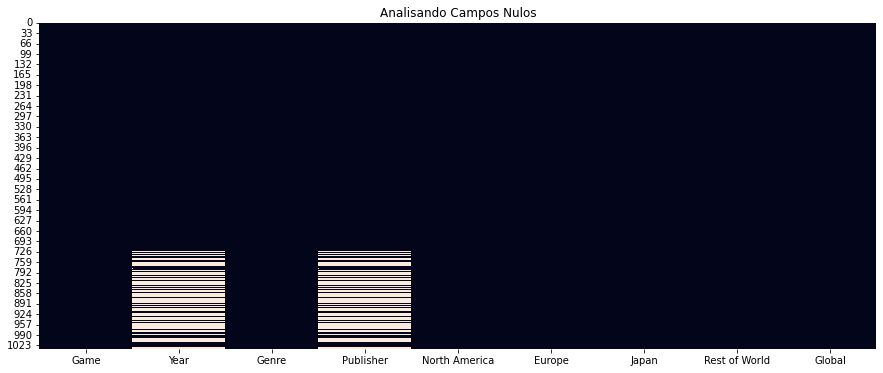

In [7]:
# Campos nulos de forma gráfica
plt.figure( figsize=(15,6) )
plt.title( 'Analisando Campos Nulos' )
sns.heatmap( dados.isnull(), cbar=False );

In [8]:
# Retirando os campos nulos
dados.dropna( inplace=True )

dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [9]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


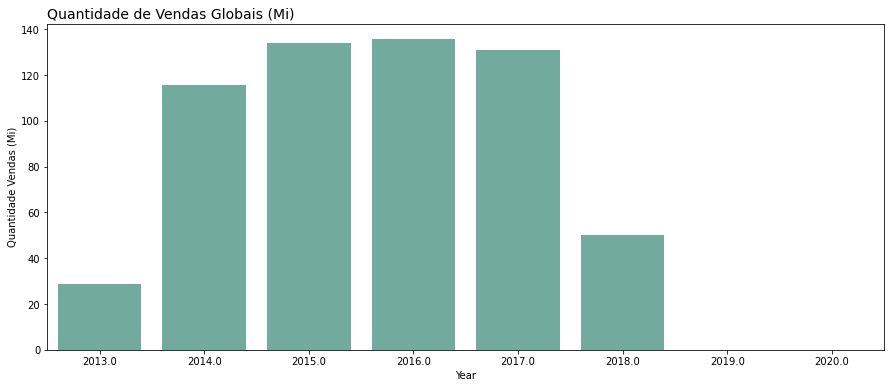

In [10]:
# Tamanho imagem
plt.figure( figsize=(15,6) )

# Título
plt.title( 'Quantidade de Vendas Globais (Mi)', loc='left', fontsize=14 )

# Gráfico
sns.barplot( data=dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum )

# Label (Categoria)
plt.ylabel( 'Quantidade Vendas (Mi)' );

In [11]:
# Retirar os anos de 2019, 2020
dados.loc[ ( dados['Year'] != 2019 ) & ( dados['Year'] != 2020 ) ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [12]:
# Verificando os valores únicos da coluna Year
dados = dados.loc[ ( dados['Year'] != 2019 ) & (dados['Year'] != 2020 ) ]

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


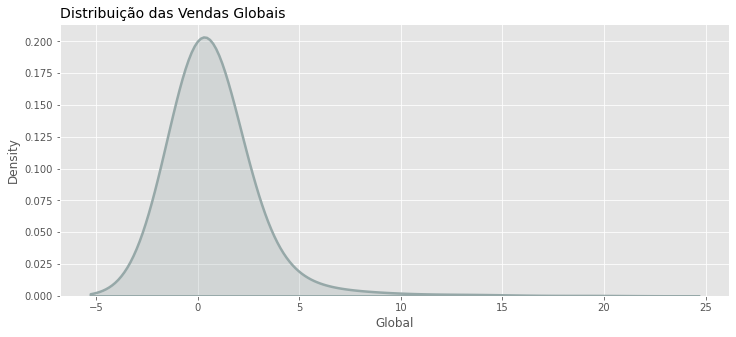

In [13]:
# Tamanho da plotagem
plt.figure( figsize=(12,5) )

# Estilo
plt .style.use('ggplot')

# Título
plt.title( "Distribuição das Vendas Globais", loc='left', fontsize=14 )

# Plotagem
sns.kdeplot( dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

In [14]:
Analise = dados.groupby( by=['Year'] ).sum()

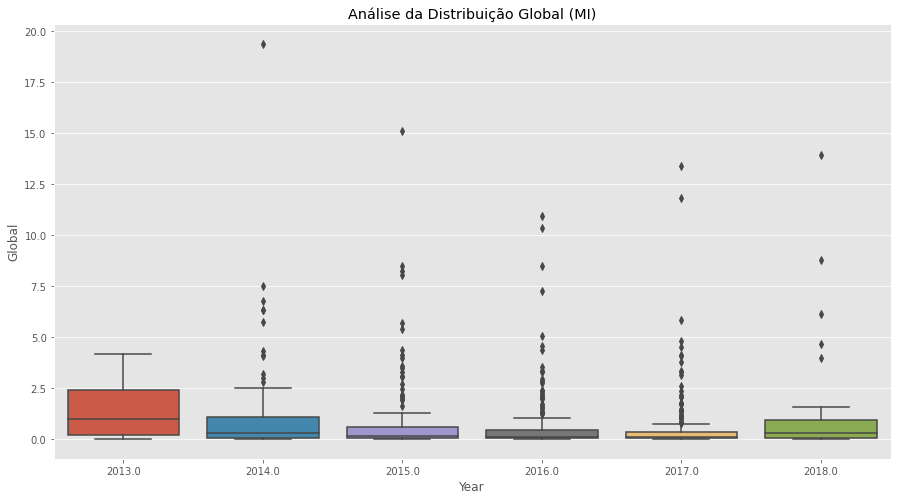

In [15]:
# Tamanho plotagem
plt.figure( figsize=(15,8) )

# Título
plt.title('Análise da Distribuição Global (MI)')
sns.boxplot( data=dados, x='Year', y='Global' );

In [16]:
dados.loc[ dados['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [17]:
dados


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [18]:
Analise.describe()

,North America,Europe,Japan,Rest of World,Global
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,35.261667,42.845000,5.781667,15.338333,99.236667
std,16.298755,21.076962,3.429737,7.258772,47.305290
min,10.350000,12.880000,0.970000,4.570000,28.760000
25%,24.687500,27.555000,3.717500,10.340000,66.612500
50%,42.285000,55.165000,5.705000,19.090000,123.375000
75%,46.742500,56.937500,8.630000,20.505000,133.217500
max,49.600000,57.980000,9.650000,20.880000,135.720000


In [19]:
Analise = Analise.reset_index( )

Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [20]:
# Exemplo do que o código abaixo faz
# 10.35 / 28.76 * 100, realizando um looping em todos os valores das colunas America e Total

# Analisando a proporcao dos 100% de cada continente comparado ao total
America = [ round(America / Total * 100, 2) for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ round(Europa / Total * 100, 2) for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ round(Japao / Total * 100, 2) for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
RestoMundo = [ round(RestoMundo / Total * 100, 2) for RestoMundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, RestoMundo

([35.99, 34.35, 37.02, 34.92, 34.2, 39.14],
 [44.78, 46.72, 41.95, 42.72, 43.68, 37.25],
 [3.37, 3.09, 5.43, 7.11, 6.94, 8.23],
 [15.89, 15.79, 15.58, 15.26, 15.19, 15.32])

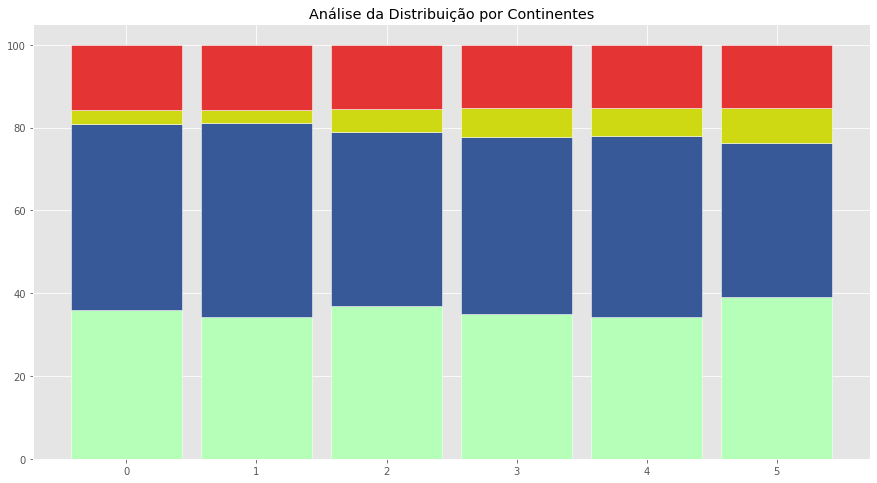

In [26]:
# Tamanho da Plotagem
plt.figure( figsize=(15,8) )

# Largura da barra
largura_barra = 0.85
rotulos = Analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# Plot America
plt.bar( grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white' )

# Plot Europa
plt.bar( grupos, Europa, bottom=America, width=largura_barra, color='#385998', edgecolor='white' )

# Plot Japao
plt.bar( grupos, Japao, bottom=[ a + b for a, b in zip(America, Europa) ], width=largura_barra, color='#CFD913', edgecolor='white' )

# Plot Resto do Mundo
plt.bar( grupos, RestoMundo, bottom=[ a + b + c for a, b, c in zip(America, Europa, Japao) ], width=largura_barra, color='#E43434', edgecolor='white' ) 

# Título
plt.title('Análise da Distribuição por Continentes');